# DeepEvoOpt: Hyperparameter Optimization for Deep Learning

This notebook provides a UI for running experiments with various meta-heuristic optimizers on CNN and MLP models using Fashion-MNIST.

In [1]:
import os
import sys
import matplotlib.pyplot as plt
import pandas as pd
import json

# Add src to path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from src.run_experiments import run_experiment, OPTIMIZERS
from src.train import train_final_model

## Configuration

In [ ]:
MODEL_TYPE = 'cnn' # 'cnn' or 'mlp'
POP_SIZE = 5
MAX_ITER = 5
OPTIMIZERS_TO_TEST = ['ga', 'pso', 'gwo'] # Add others as needed: 'aco', 'firefly', 'abc', 'obc_woa', 'fcr', 'fcgwo'

## Run Experiments

In [ ]:
results = {}

for opt in OPTIMIZERS_TO_TEST:
    print(f"--- Running {opt.upper()} ---")
    best_sol = run_experiment(opt, MODEL_TYPE, POP_SIZE, MAX_ITER)
    results[opt] = best_sol

--- Running GA ---
Running GA on cnn...


100%|██████████| 26.4M/26.4M [00:19<00:00, 1.38MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 338kB/s]
100%|██████████| 4.42M/4.42M [00:07<00:00, 578kB/s]
100%|██████████| 5.15k/5.15k [00:00<?, ?B/s]


GA Iteration 1/5, Best Loss: 0.2673
GA Iteration 2/5, Best Loss: 0.2673
GA Iteration 3/5, Best Loss: 0.2673
GA Iteration 4/5, Best Loss: 0.2673
GA Iteration 5/5, Best Loss: 0.2673
Optimization finished. Best Loss: 0.2672616848920254
Best Hyperparams: {'lr': 0.0007705334797244552, 'batch_size': 32, 'dropout': 0.18564402172478045, 'conv1_out': 32, 'kernel1': 5, 'conv2_out': 128, 'kernel2': 5, 'fc1_out': 64, 'hidden1': 64, 'hidden2': 128, 'optimizer': 'adam'}
--- Running PSO ---
Running PSO on cnn...
PSO Iteration 1/5, Best Loss: 0.3016
PSO Iteration 2/5, Best Loss: 0.2952
PSO Iteration 3/5, Best Loss: 0.2952
PSO Iteration 4/5, Best Loss: 0.2952
PSO Iteration 5/5, Best Loss: 0.2952
Optimization finished. Best Loss: 0.29523186924609734
Best Hyperparams: {'lr': 0.00867818830087717, 'batch_size': 64, 'dropout': 0.21118944124403685, 'conv1_out': 64, 'kernel1': 5, 'conv2_out': 64, 'kernel2': 3, 'fc1_out': 128, 'hidden1': 128, 'hidden2': 32, 'optimizer': 'sgd'}
--- Running GWO ---
Running GWO o

## Visualization

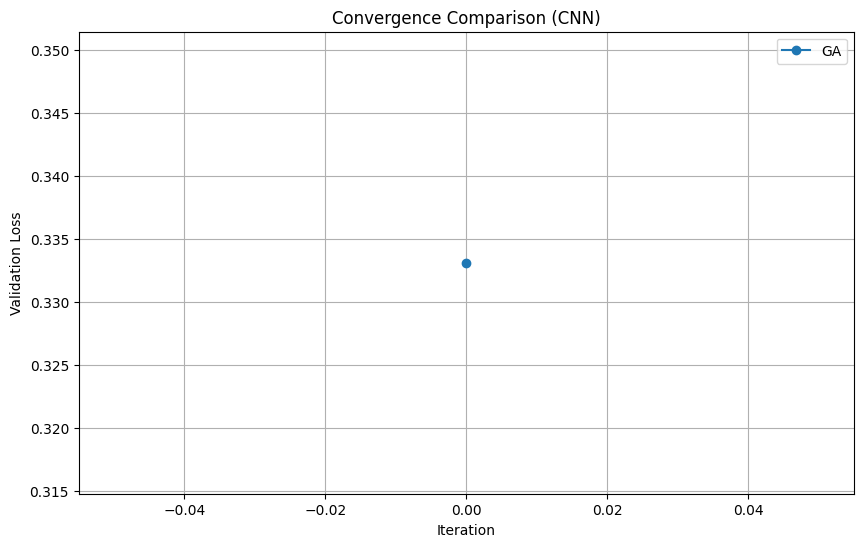

In [ ]:
plt.figure(figsize=(10, 6))

for opt in OPTIMIZERS_TO_TEST:
    history_file = f'../results/logs/{opt}_{MODEL_TYPE}_history.csv'
    if os.path.exists(history_file):
        df = pd.read_csv(history_file)
        plt.plot(df['iteration'], df['val_loss'], label=opt.upper(), marker='o')

plt.title(f'Convergence Comparison ({MODEL_TYPE.upper()})')
plt.xlabel('Iteration')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

## Train Final Model with Best Found Hyperparameters

In [ ]:
# Select best optimizer from this run
# For demo, just pick the first one or manually specify
best_opt_name = OPTIMIZERS_TO_TEST[0]
best_params = results[best_opt_name]

print(f"Training final model with params from {best_opt_name.upper()}: {best_params}")
acc = train_final_model(best_params, model_type=MODEL_TYPE, epochs=5)

Training final model with params from GA: {'lr': 0.0007705334797244552, 'batch_size': 32, 'dropout': 0.18564402172478045, 'conv1_out': 32, 'kernel1': 5, 'conv2_out': 128, 'kernel2': 5, 'fc1_out': 64, 'hidden1': 64, 'hidden2': 128, 'optimizer': 'adam'}


AssertionError: Torch not compiled with CUDA enabled